# Diabetes Risk Prediction - Data Preprocessing

This notebook focuses on cleaning and preparing the dataset
for machine learning modeling. The steps include:

- Handling invalid zero values
- Missing value treatment
- Outlier handling
- Feature scaling
- Train-test split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

## Loading dataset

In [3]:
df=pd.read_csv("../data/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing Step 1: Handing Invalid Zero Values
Certain medical attributes such as Glucose,BP, Skin Thickness, Insulin, Age and BMI can't be realistically be zero.  

To ensure data integrity, zero values in these column are converted to NaN and later imputed appropriately.

In [5]:
zero_cols=['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols]=df[zero_cols].replace(0,np.nan)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Preprocessing Step 2: Missing Value Imputation
In EDA we have seen almost all features has skewed distributions. So, **Median Imputation** is used here. Median is robust to outliers or extreme values and preserves better central tendency than mean in skewed data.

In [7]:
for col in zero_cols:
    df[col]=df[col].fillna(df[col].median())
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Preprocessing Step 3: Outlier Handling

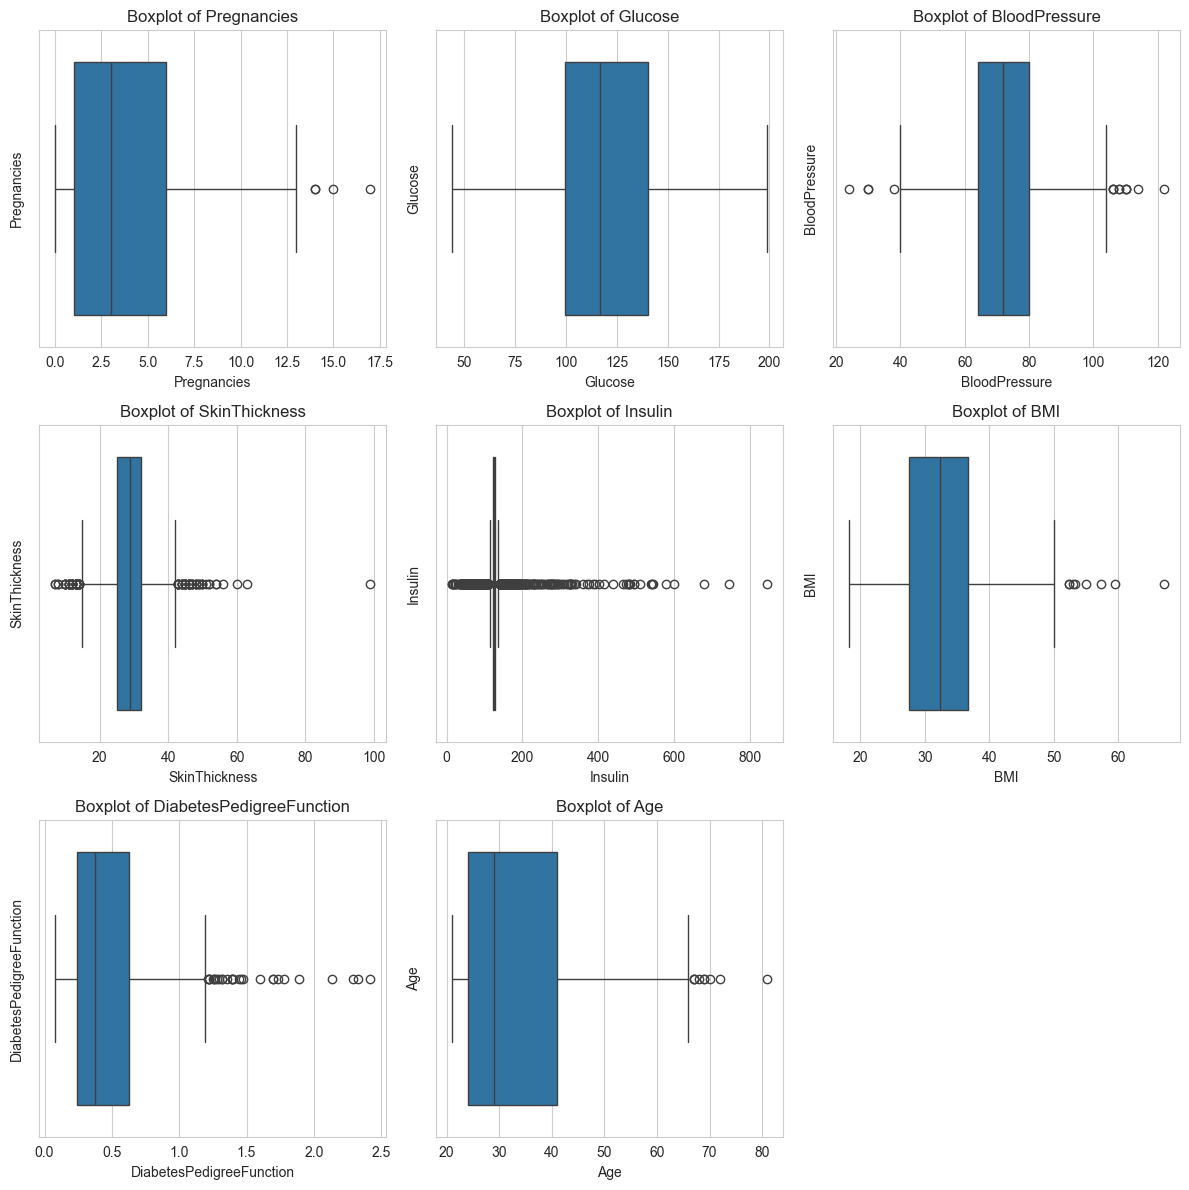

In [17]:
cols = df.columns[:-1]   
n_cols = 3               
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])  #ax=axes[i] the subplots to draw
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# Hide empty subplots
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
print(f"{'Column Name':<25} | {'Max Value':<10}")
print(f"{"-" * 26}|{"-" * 10}")
for col in df.columns[:-1]:
    max_val = df[col].max()
    print(f"{col:<25} | {max_val:<10}")

Column Name               | Max Value 
--------------------------|----------
Pregnancies               | 17        
Glucose                   | 199.0     
BloodPressure             | 122.0     
SkinThickness             | 99.0      
Insulin                   | 846.0     
BMI                       | 67.1      
DiabetesPedigreeFunction  | 2.42      
Age                       | 81        


## Observation
> After median imputation, boxplots show an increased number
of statistical outliers. This is due to concentration of
values around the median, which reduces IQR and causes more
points to fall outside the 1.5×IQR range.  
However, these extreme values are clinically plausible, may
correspond to severe or high-risk patients and
represent rare but valid observations. Therefore, no further
outlier removal is performed.

### Log Transformation of Insulin:
The Insulin feature exhibited strong right skewness with a
long extreme tail. As linear models are sensitive to skewed
distributions and high variance, logarithmic transformation
(log1p) was applied to stabilize variance and reduce skewness
while preserving relative ordering.

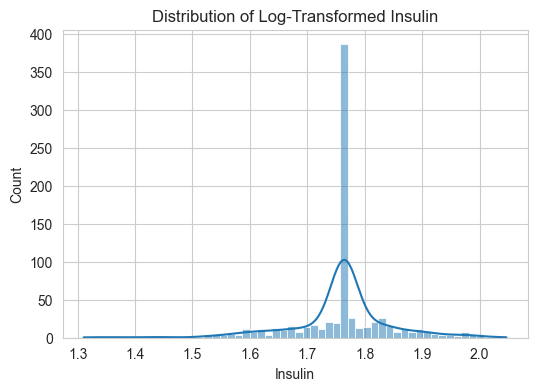

In [23]:
df['Insulin'] = np.log1p(df['Insulin'])   #p for plus 1

plt.figure(figsize=(6,4))
sns.histplot(df['Insulin'], kde=True)
plt.title("Distribution of Log-Transformed Insulin")
plt.show()

## Saving the preprocessed dataset:

In [25]:
df.to_csv("../data/processed/diabetes_preprocessed_v1.csv", index=False)